# https://github.com/zazencodes/zazencodes-youtube/blob/main/src/multimodal-embeddings/notebooks/src/part_4_fine_tuning_clip_embeddings.ipynb
```
transformers
pillow
scipy
torch
requests
numpy
pandas
seaborn
matplotlib
tqdm
torchvision
scikit-learn
memory_profiler
setuptools
librosa
clip
```

In [92]:
import os
import pandas as pd
from pathlib import Path
from IPython.display import display
from PIL import Image
from tqdm import tqdm
from collections import Counter
import numpy as np
def create_image_dataframe(base_path):
    # Initialize lists to store image paths and labels
    image_paths = []
    labels = []

    # Iterate through each subdirectory (label)
    for label in sorted(os.listdir(base_path)):
        label_path = os.path.join(base_path, label)
        if os.path.isdir(label_path):
            # List all files in the subdirectory (assuming they are images)
            for file_name in sorted(os.listdir(label_path)):
                file_path = os.path.join(label_path, file_name)
                if os.path.isfile(file_path):
                    image_paths.append(file_path)
                    labels.append(label)

    # Create a DataFrame
    df = pd.DataFrame({
        'rgb_image_path': image_paths,
        'label': labels
    })

    return df

# Example usage
base_path = "/home/sebastian/codes/SensoryCity_working/0_classifier/Split/train"
df = create_image_dataframe(base_path)
print(df.head())

# Save to CSV if needed
df.to_csv('data.csv', index=False)

                                      rgb_image_path label
0  /home/sebastian/codes/SensoryCity_working/0_cl...    BI
1  /home/sebastian/codes/SensoryCity_working/0_cl...    BI
2  /home/sebastian/codes/SensoryCity_working/0_cl...    BI
3  /home/sebastian/codes/SensoryCity_working/0_cl...    BI
4  /home/sebastian/codes/SensoryCity_working/0_cl...    BI


In [93]:
rgb_image_paths = df.rgb_image_path.tolist()

rgb_image_paths[:10]

['/home/sebastian/codes/SensoryCity_working/0_classifier/Split/train/BI/0_BAM-FS_0.png',
 '/home/sebastian/codes/SensoryCity_working/0_classifier/Split/train/BI/1001_BBI_1190.png',
 '/home/sebastian/codes/SensoryCity_working/0_classifier/Split/train/BI/1003_BBI_1192.png',
 '/home/sebastian/codes/SensoryCity_working/0_classifier/Split/train/BI/1004_BBI_1193.png',
 '/home/sebastian/codes/SensoryCity_working/0_classifier/Split/train/BI/1005_BBI_1194.png',
 '/home/sebastian/codes/SensoryCity_working/0_classifier/Split/train/BI/1006_BBI_1195.png',
 '/home/sebastian/codes/SensoryCity_working/0_classifier/Split/train/BI/1007_BBI_1196.png',
 '/home/sebastian/codes/SensoryCity_working/0_classifier/Split/train/BI/1009_BBI_1198.png',
 '/home/sebastian/codes/SensoryCity_working/0_classifier/Split/train/BI/1010_BBI_1199.png',
 '/home/sebastian/codes/SensoryCity_working/0_classifier/Split/train/BI/1011_BBI_12.png']

In [94]:
image_labels = df.label.tolist()
image_labels[:10]

['BI', 'BI', 'BI', 'BI', 'BI', 'BI', 'BI', 'BI', 'BI', 'BI']

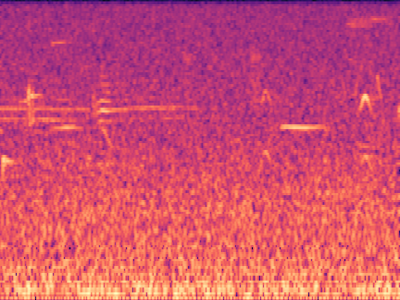

In [95]:
display(Image.open(rgb_image_paths[4]).resize((400,300)))

In [96]:
label_counts=Counter(image_labels)
Counter(image_labels)

Counter({'TM': 2828,
         'VM': 1706,
         'BI': 1276,
         'GE': 1269,
         'SI': 1110,
         'MH': 1022})

In [97]:
# class_mapping = {
#     'TM': 'Motorized Transport - General traffic including vehicles, cars, and planes.',
#     'VM': 'Voices and Instruments - Voices, instruments, and music.',
#     'BI': 'Biophony - Wildlife or domesticated animals.',
#     'GE': 'Geophonies - Natural sounds like wind, rain, and thunder.',
#     'SI': 'Silence - Quiet and absence of sound.',
#     'MH': 'Human Movement - People walking and bicycles.'
# }
import pandas as pd

# Mapping of labels to their descriptions
class_mapping = {
    'TM': 'Motorized-Transport',
    'VM': 'Voices-and-Instruments',
    'BI': 'Biophony',
    'GE': 'Geophonies',
    'SI': 'Silence',
    'MH': 'Human-Movement'
}

# Function to generate captions for the entire dataset
def generate_captions(image_labels):
    # Create a DataFrame from the image labels
    df = pd.DataFrame(image_labels, columns=['image_label'])
    
    # Map the label descriptions and create captions
    df['description'] = df['image_label'].map(class_mapping)
    df['caption'] = df['description'].apply(
        lambda desc: f"This is a Soundscape Spectrogram capturing an area characterized by {desc}"
        if pd.notna(desc) else "Unknown"
    )
    
    return df

# Example usage
result_df = generate_captions(image_labels)


In [98]:
print(np.unique(image_labels))

['BI' 'GE' 'MH' 'SI' 'TM' 'VM']


In [99]:
result_df

,image_label,description,caption
0,BI,Biophony,This is a Soundscape Spectrogram capturing an ...
1,BI,Biophony,This is a Soundscape Spectrogram capturing an ...
2,BI,Biophony,This is a Soundscape Spectrogram capturing an ...
3,BI,Biophony,This is a Soundscape Spectrogram capturing an ...
4,BI,Biophony,This is a Soundscape Spectrogram capturing an ...
...,...,...,...
9206,VM,Voices-and-Instruments,This is a Soundscape Spectrogram capturing an ...
9207,VM,Voices-and-Instruments,This is a Soundscape Spectrogram capturing an ...
9208,VM,Voices-and-Instruments,This is a Soundscape Spectrogram capturing an ...
9209,VM,Voices-and-Instruments,This is a Soundscape Spectrogram capturing an ...


In [100]:
captions  = result_df.caption.tolist()

In [101]:
np.unique(captions)

array(['This is a Soundscape Spectrogram capturing an area characterized by Biophony',
       'This is a Soundscape Spectrogram capturing an area characterized by Geophonies',
       'This is a Soundscape Spectrogram capturing an area characterized by Human-Movement',
       'This is a Soundscape Spectrogram capturing an area characterized by Motorized-Transport',
       'This is a Soundscape Spectrogram capturing an area characterized by Silence',
       'This is a Soundscape Spectrogram capturing an area characterized by Voices-and-Instruments'],
      dtype='<U90')

In [102]:
captions[:3]

['This is a Soundscape Spectrogram capturing an area characterized by Biophony',
 'This is a Soundscape Spectrogram capturing an area characterized by Biophony',
 'This is a Soundscape Spectrogram capturing an area characterized by Biophony']

In [103]:
import numpy as np
m = np.array(captions) == "This is a Soundscape Spectrogram capturing an area characterized by Biophony"
m

array([ True,  True,  True, ..., False, False, False])

In [104]:
m

array([ True,  True,  True, ..., False, False, False])

In [105]:
m.sum()

np.int64(1276)

In [106]:
np.where(m)[0]

array([   0,    1,    2, ..., 1273, 1274, 1275])

In [107]:
np.where(m)[0]

array([   0,    1,    2, ..., 1273, 1274, 1275])

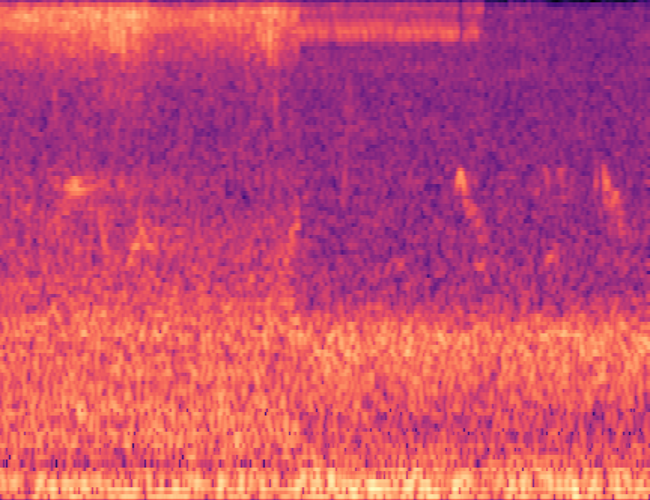

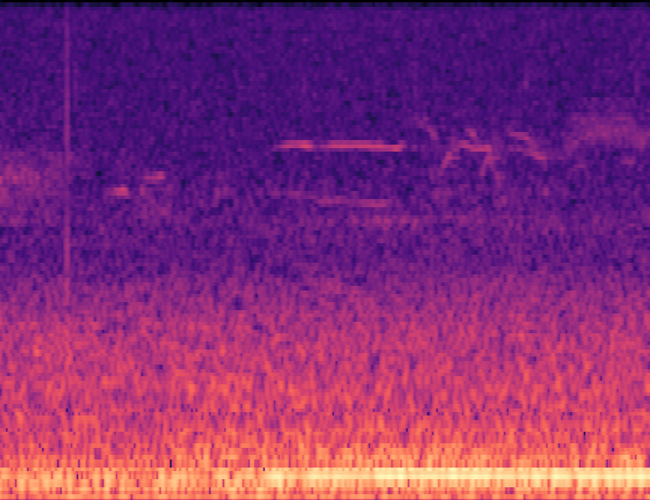

In [108]:
for idx in np.random.choice(np.where(m)[0], 2):
    display(Image.open(rgb_image_paths[idx]).resize((650,500)))

# Zero shot

In [109]:
from dataclasses import dataclass
from random import shuffle

In [110]:
@dataclass
class Record:
    caption: str
    image: str

In [111]:
data = [Record(caption, image) for caption, image in zip(captions, rgb_image_paths)]
shuffle(data)

In [112]:
data

[Record(caption='This is a Soundscape Spectrogram capturing an area characterized by Voices-and-Instruments', image='/home/sebastian/codes/SensoryCity_working/0_classifier/Split/train/VM/VNE_49_P2_61.png'),
 Record(caption='This is a Soundscape Spectrogram capturing an area characterized by Geophonies', image='/home/sebastian/codes/SensoryCity_working/0_classifier/Split/train/GE/SQC_37_P3_12.png'),
 Record(caption='This is a Soundscape Spectrogram capturing an area characterized by Geophonies', image='/home/sebastian/codes/SensoryCity_working/0_classifier/Split/train/GE/SQC_49_P3_142.png'),
 Record(caption='This is a Soundscape Spectrogram capturing an area characterized by Human-Movement', image='/home/sebastian/codes/SensoryCity_working/0_classifier/Split/train/MH/VNE_59_P1_76.png'),
 Record(caption='This is a Soundscape Spectrogram capturing an area characterized by Human-Movement', image='/home/sebastian/codes/SensoryCity_working/0_classifier/Split/train/MH/SQC_58_P1_109.png'),
 Re

In [113]:
print(type(data[0]))  # Should print <class '__main__.Record'>
print(data[0])  # Should print something like Record(caption='...', image='...')

<class '__main__.Record'>
Record(caption='This is a Soundscape Spectrogram capturing an area characterized by Voices-and-Instruments', image='/home/sebastian/codes/SensoryCity_working/0_classifier/Split/train/VM/VNE_49_P2_61.png')


In [114]:
len(data)

9211

In [115]:
import torch

# Check if CUDA is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using CUDA device!")
else:
    print("CUDA device not found, defaulting to CPU.")
    device = torch.device("cpu")

# Optionally, print the CUDA device name
if device.type == "cuda":
    print(f"Running on: {torch.cuda.get_device_name(device)}")

Using CUDA device!
Running on: NVIDIA GeForce RTX 4090


In [116]:
# !pip install transformers

In [117]:
from transformers import CLIPModel, CLIPProcessor
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
model_zs = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")

In [118]:
!ls ~/.cache/huggingface/

hub


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [119]:
captions_t = [record.caption for record in data[:3]]
images = [Image.open(record.image) for record in data[:3]]
inputs = processor(text=captions_t, images=images, return_tensors="pt", padding=True)

In [120]:
inputs

{'input_ids': tensor([[49406,   589,   533,   320,  5236, 12314, 27646,  2338, 19548,   550,
          2445, 10997,  7690,   638,  9144,   268,   537,   268, 14793, 49407],
        [49406,   589,   533,   320,  5236, 12314, 27646,  2338, 19548,   550,
          2445, 10997,  7690,   638,   619, 25120,   963, 49407, 49407, 49407],
        [49406,   589,   533,   320,  5236, 12314, 27646,  2338, 19548,   550,
          2445, 10997,  7690,   638,   619, 25120,   963, 49407, 49407, 49407]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0]]), 'pixel_values': tensor([[[[-7.2658e-01, -8.5796e-01, -8.2877e-01,  ..., -9.0176e-01,
           -7.7037e-01, -8.8716e-01],
          [-7.4118e-01, -8.8716e-01, -8.5796e-01,  ..., -8.8716e-01,
           -7.9957e-01, -9.1636e-01],
          [-8.1417e-01, -1.0623e+00, -1.0039e+0

In [121]:
captions[0]

'This is a Soundscape Spectrogram capturing an area characterized by Biophony'

In [122]:
inputs["pixel_values"][0].shape

torch.Size([3, 224, 224])

In [123]:
from tqdm import tqdm
# !pip install more-itertools
from more_itertools import batched

In [124]:

batch_size = 8
labels_gt = np.unique(captions)
labels

tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
         42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
         56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
         70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
         84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
         98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
        112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
        126, 127], device='cuda:0')

In [125]:
labels_gt = labels_gt.tolist()

In [126]:
labels_gt

['This is a Soundscape Spectrogram capturing an area characterized by Biophony',
 'This is a Soundscape Spectrogram capturing an area characterized by Geophonies',
 'This is a Soundscape Spectrogram capturing an area characterized by Human-Movement',
 'This is a Soundscape Spectrogram capturing an area characterized by Motorized-Transport',
 'This is a Soundscape Spectrogram capturing an area characterized by Silence',
 'This is a Soundscape Spectrogram capturing an area characterized by Voices-and-Instruments']

In [147]:
model_zs.eval()
print(f"Using {device} device")
model_zs.to(device)
correct = 0
total = 0
for batch in tqdm(list(batched(data, batch_size))):
    captions = np.array([record.caption for record in batch])
    images = [Image.open(record.image) for record in batch]
    inputs = processor(text=labels_gt, images=images, return_tensors="pt", padding=True)
    inputs = {k: v.to(device) for k, v in inputs.items()}
    with torch.no_grad():
        outputs = model_zs(**inputs)
        logits_per_image = outputs.logits_per_image # this is the image-text similarity score
        # probs = logits_per_image.softmax(dim=1)  # we can take the softmax to get the label probabilities

        pred_idx = torch.argmax(logits_per_image, dim=1)
        pred_labels = np.array([labels_gt[pred] for pred in pred_idx])
        correct += (pred_labels == captions).sum().item()
        total += len(batch)

        break

Using cuda device


  0%|                                                                                                                                                                            | 0/72 [00:01<?, ?it/s]


In [148]:
pred_idx = torch.argmax(logits_per_image, dim=1)
pred_idx

tensor([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
        1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
        0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 4, 0, 3, 0, 1, 0, 0, 0, 0, 1, 0, 1,
        1, 0, 0, 0, 0, 1, 1, 1], device='cuda:0')

In [149]:
from scipy.special import softmax
softmax(logits_per_image[0].to("cpu"))

array([0.21469417, 0.19421545, 0.1443909 , 0.16793719, 0.17220457,
       0.10655778], dtype=float32)

In [150]:
[labels_gt[idx] for idx in pred_idx]

['This is a Soundscape Spectrogram capturing an area characterized by Biophony',
 'This is a Soundscape Spectrogram capturing an area characterized by Geophonies',
 'This is a Soundscape Spectrogram capturing an area characterized by Geophonies',
 'This is a Soundscape Spectrogram capturing an area characterized by Geophonies',
 'This is a Soundscape Spectrogram capturing an area characterized by Geophonies',
 'This is a Soundscape Spectrogram capturing an area characterized by Geophonies',
 'This is a Soundscape Spectrogram capturing an area characterized by Biophony',
 'This is a Soundscape Spectrogram capturing an area characterized by Geophonies',
 'This is a Soundscape Spectrogram capturing an area characterized by Biophony',
 'This is a Soundscape Spectrogram capturing an area characterized by Geophonies',
 'This is a Soundscape Spectrogram capturing an area characterized by Geophonies',
 'This is a Soundscape Spectrogram capturing an area characterized by Geophonies',
 'This is 

In [151]:
logits_per_image

tensor([[35.1589, 35.0587, 34.7623, 34.9133, 34.9384, 34.4584],
        [34.3593, 34.3726, 33.7753, 33.7454, 34.1852, 33.2848],
        [35.6992, 35.7234, 35.2556, 35.3061, 35.4904, 34.8405],
        [34.7299, 34.7975, 34.3028, 34.5292, 34.4815, 33.9708],
        [35.8171, 35.8576, 35.3400, 35.0185, 35.7251, 34.8616],
        [36.4344, 36.4426, 36.0631, 36.0670, 36.1901, 35.6588],
        [35.2385, 35.1799, 34.6647, 34.8183, 34.9487, 34.3927],
        [34.9557, 34.9916, 34.3174, 34.4817, 34.6389, 33.8769],
        [35.4772, 35.3570, 34.7104, 34.5649, 35.0143, 34.1509],
        [34.9945, 35.1394, 34.6858, 35.0924, 34.6631, 33.9716],
        [35.4130, 35.4547, 34.7773, 35.2140, 35.1139, 34.9689],
        [34.0130, 34.2197, 33.2589, 33.8851, 33.7286, 32.9215],
        [35.5611, 35.5439, 34.9978, 35.4087, 35.2403, 34.8909],
        [35.4946, 35.5305, 35.1178, 35.0939, 35.3293, 34.6664],
        [36.0792, 36.1776, 35.6978, 35.6915, 36.0153, 35.3261],
        [35.0863, 35.0623, 34.6457, 34.8

In [152]:
pred_idx

tensor([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
        1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
        0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 4, 0, 3, 0, 1, 0, 0, 0, 0, 1, 0, 1,
        1, 0, 0, 0, 0, 1, 1, 1], device='cuda:0')

In [153]:
pred_labels

array(['This is a Soundscape Spectrogram capturing an area characterized by Biophony',
       'This is a Soundscape Spectrogram capturing an area characterized by Geophonies',
       'This is a Soundscape Spectrogram capturing an area characterized by Geophonies',
       'This is a Soundscape Spectrogram capturing an area characterized by Geophonies',
       'This is a Soundscape Spectrogram capturing an area characterized by Geophonies',
       'This is a Soundscape Spectrogram capturing an area characterized by Geophonies',
       'This is a Soundscape Spectrogram capturing an area characterized by Biophony',
       'This is a Soundscape Spectrogram capturing an area characterized by Geophonies',
       'This is a Soundscape Spectrogram capturing an area characterized by Biophony',
       'This is a Soundscape Spectrogram capturing an area characterized by Geophonies',
       'This is a Soundscape Spectrogram capturing an area characterized by Geophonies',
       'This is a Soundscap

In [154]:
labels_gt

['This is a Soundscape Spectrogram capturing an area characterized by Biophony',
 'This is a Soundscape Spectrogram capturing an area characterized by Geophonies',
 'This is a Soundscape Spectrogram capturing an area characterized by Human-Movement',
 'This is a Soundscape Spectrogram capturing an area characterized by Motorized-Transport',
 'This is a Soundscape Spectrogram capturing an area characterized by Silence',
 'This is a Soundscape Spectrogram capturing an area characterized by Voices-and-Instruments']

In [155]:
# Evaluate prior to fine-tuning

# Function to evaluate the model
def evaluate(model, processor, data, batch_size=32):
    # labels = ['This is a Soundscape Spectrogram capturing an area characterized by Biophony', 'This is a Soundscape Spectrogram capturing an area characterized by Geophonies', 'This is a Soundscape Spectrogram capturing an area characterized by Human-Movement', 'This is a Soundscape Spectrogram capturing an area characterized by Motorized-Transport', 'This is a Soundscape Spectrogram capturing an area characterized by Silence', 'This is a Soundscape Spectrogram capturing an area characterized by Voices-and-Instruments']
    model.eval()
    print(f"Using {device} device")
    model.to(device)
    correct = 0
    total = 0
    for batch in tqdm(list(batched(data, batch_size))):
        captions = np.array([record.caption for record in batch])
        images = [Image.open(record.image) for record in batch]
        inputs = processor(text=labels_gt, images=images, return_tensors="pt", padding=True)
        inputs = {k: v.to(device) for k, v in inputs.items()}
        with torch.no_grad():
            outputs = model(**inputs)
            logits_per_image = outputs.logits_per_image # this is the image-text similarity score
            # probs = logits_per_image.softmax(dim=1)  # we can take the softmax to get the label probabilities

            pred_idx = torch.argmax(logits_per_image, dim=1)
            pred_labels = np.array([labels_gt[pred] for pred in pred_idx])
            correct += (pred_labels == captions).sum().item()
            total += len(batch)

    return correct / total
accuracy_before_fine_tuning = evaluate(model_zs, processor, data,batch_size=64)

Using cuda device


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 144/144 [01:10<00:00,  2.04it/s]


In [156]:
accuracy_before_fine_tuning

0.12170231245250245

# Fintuned model

In [157]:
import time
from datetime import timedelta
from torch.optim import AdamW

In [158]:
processor_finetuned = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
model_finetuned = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")

optimizer = AdamW(model_finetuned.parameters(), lr=5e-6)

num_epochs = 10
batch_size = 128

model_finetuned.train()
model_finetuned.to(device)
epoch_losses = []
for epoch in list(range(num_epochs)):
    start_time = time.time()
    epoch_loss = 0
    for batch in tqdm(list(batched(data, batch_size))):
        captions = [record.caption for record in batch]
        images = [Image.open(record.image) for record in batch]
        inputs = processor(text=captions, images=images, return_tensors="pt", padding=True)
        inputs = {k: v.to(device) for k, v in inputs.items()}
        outputs = model_finetuned(**inputs)

        # Compute cosine similarity
        logits_per_image = outputs.logits_per_image
        logits_per_text = outputs.logits_per_text

        labels = torch.arange(len(images), device=device)
        image_loss = torch.nn.functional.cross_entropy(logits_per_image, labels)
        text_loss = torch.nn.functional.cross_entropy(logits_per_text, labels)
        loss = (image_loss + text_loss) / 2

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        epoch_loss += loss.item()

    avg_epoch_loss = epoch_loss / len(data)
    end_time = time.time()
    epoch_duration = end_time - start_time
    epoch_losses.append(avg_epoch_loss)
    
    print(f"Epoch {epoch+1}/{num_epochs} - Loss: {avg_epoch_loss:.4f} - Duration: {str(timedelta(seconds=epoch_duration))} seconds")

    # break
  

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 72/72 [01:20<00:00,  1.12s/it]


Epoch 1/10 - Loss: 0.0305 - Duration: 0:01:20.852154 seconds


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 72/72 [01:20<00:00,  1.12s/it]


Epoch 2/10 - Loss: 0.0287 - Duration: 0:01:20.944247 seconds


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 72/72 [01:20<00:00,  1.12s/it]


Epoch 3/10 - Loss: 0.0278 - Duration: 0:01:20.983449 seconds


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 72/72 [01:20<00:00,  1.12s/it]


Epoch 4/10 - Loss: 0.0271 - Duration: 0:01:20.935723 seconds


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 72/72 [01:20<00:00,  1.12s/it]


Epoch 5/10 - Loss: 0.0266 - Duration: 0:01:20.945277 seconds


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 72/72 [01:20<00:00,  1.12s/it]


Epoch 6/10 - Loss: 0.0264 - Duration: 0:01:20.899863 seconds


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 72/72 [01:21<00:00,  1.13s/it]


Epoch 7/10 - Loss: 0.0258 - Duration: 0:01:21.044088 seconds


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 72/72 [01:20<00:00,  1.12s/it]


Epoch 8/10 - Loss: 0.0254 - Duration: 0:01:20.983966 seconds


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 72/72 [01:20<00:00,  1.12s/it]


Epoch 9/10 - Loss: 0.0254 - Duration: 0:01:20.878395 seconds


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 72/72 [01:21<00:00,  1.13s/it]

Epoch 10/10 - Loss: 0.0251 - Duration: 0:01:21.015714 seconds


Text(0, 0.5, 'average loss')

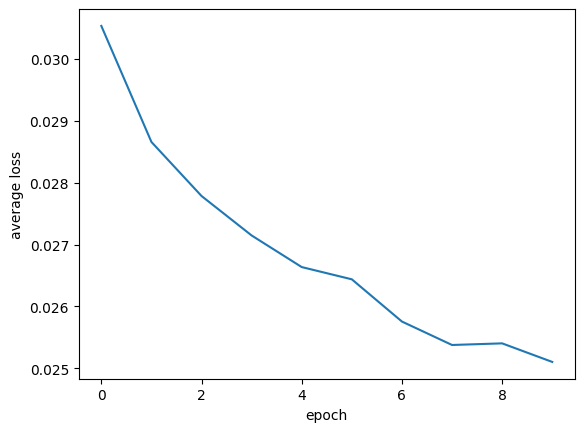

In [159]:
import matplotlib.pyplot as plt
plt.plot(epoch_losses)
plt.xlabel("epoch")
plt.ylabel("average loss")

In [160]:
model_finetuned.save_pretrained("./enet-finetuned-clip-v1-model")
processor_finetuned.save_pretrained("./enet-finetuned-clip-v1-processor")

[]

In [161]:
accuracy_after_training = evaluate(model_finetuned, processor, data)
accuracy_after_training

Using cuda device


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 288/288 [01:11<00:00,  4.01it/s]


0.9937031809792639

# Test data

In [162]:
# Example usage
base_path = "/home/sebastian/codes/SensoryCity_working/0_classifier/Split/test"
df = create_image_dataframe(base_path)
test_rgb_image_paths = df.rgb_image_path.tolist()
test_image_labels = df.label.tolist()
result_df_test = generate_captions(test_image_labels)
test_captions  = result_df_test.caption.tolist()

test_data = [Record(caption=caption, image=str(image)) for caption, image in zip(test_captions, test_rgb_image_paths)]
test_data

[Record(caption='This is a Soundscape Spectrogram capturing an area characterized by Biophony', image='/home/sebastian/codes/SensoryCity_working/0_classifier/Split/test/BI/100_BAM-FS_189.png'),
 Record(caption='This is a Soundscape Spectrogram capturing an area characterized by Biophony', image='/home/sebastian/codes/SensoryCity_working/0_classifier/Split/test/BI/1049_BBI_1233.png'),
 Record(caption='This is a Soundscape Spectrogram capturing an area characterized by Biophony', image='/home/sebastian/codes/SensoryCity_working/0_classifier/Split/test/BI/1364_BBI_268.png'),
 Record(caption='This is a Soundscape Spectrogram capturing an area characterized by Biophony', image='/home/sebastian/codes/SensoryCity_working/0_classifier/Split/test/BI/157_BAM-FS_24.png'),
 Record(caption='This is a Soundscape Spectrogram capturing an area characterized by Biophony', image='/home/sebastian/codes/SensoryCity_working/0_classifier/Split/test/BI/230_BAM-FS_305.png'),
 Record(caption='This is a Soundsc

In [163]:
def evaluate(model, processor, data, batch_size=32):
    model.eval()
    print(f"Using {device} device")
    model.to(device)
    correct = 0
    total = 0
    misclassified_images = []
    for batch in tqdm(list(batched(data, batch_size))):
        captions = np.array([record.caption for record in batch])
        images = [Image.open(record.image) for record in batch]
        inputs = processor(text=labels_gt, images=images, return_tensors="pt", padding=True)
        inputs = {k: v.to(device) for k, v in inputs.items()}
        with torch.no_grad():
            outputs = model(**inputs)
            logits_per_image = outputs.logits_per_image # this is the image-text similarity score
            # probs = logits_per_image.softmax(dim=1)  # we can take the softmax to get the label probabilities

            pred_idx = torch.argmax(logits_per_image, dim=1)
            pred_labels = np.array([labels_gt[pred] for pred in pred_idx])
            correct_labels = pred_labels == captions
            misclassified_images += [batch[i] for i, correct_label in enumerate(correct_labels) if not correct_label]

            correct += correct_labels.sum().item()
            total += len(batch)

    return correct / total, misclassified_images

In [164]:
# Evaluate the standard model
base_clip_accuracy, base_clip_misclassified_images = evaluate(model_zs, processor, test_data)
print(f"Accuracy before fine-tuning: {base_clip_accuracy}")

Using cuda device


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.30it/s]

Accuracy before fine-tuning: 0.14333333333333334


In [165]:
# Load the fine-tuned model
fine_tuned_model = CLIPModel.from_pretrained("./enet-finetuned-clip-v1-model")
fine_tuned_processor = CLIPProcessor.from_pretrained("./enet-finetuned-clip-v1-processor")

# Evaluate after fine-tuning
fine_tuned_clip_accuracy, fine_tuned_clip_misclassified_images = evaluate(fine_tuned_model, fine_tuned_processor, test_data)
print(f"Accuracy after fine-tuning: {fine_tuned_clip_accuracy}")

Using cuda device


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.33it/s]

Accuracy after fine-tuning: 0.7533333333333333
